In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Нормальное распределение

Вот так можно сгенерировать выборку из нормально распределённой случайной величины с параметрами $\mu=2.0$ и $\sigma=0.5$:

In [2]:
mu = 2.0
sigma = 0.5

# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)

# сгенерируем 10 значений
norm_rv.rvs(size=10)

array([ 2.12793427,  2.49952132,  3.14095565,  2.55475768,  1.8839865 ,
        2.60539222,  1.25773551,  2.5383185 ,  1.59282238,  2.17361695])

Параметр ```loc``` задаёт $\mu$, ```scale``` — среднеквадратичное отклонение $\sigma$, ```size``` — размер выборки. Имя параметра ```size``` при вызове функции ```rvs``` можно не писать.

Следующая функция возвращает значение функции распределения нормальной случайной величины в точке, соответствующей её аргументу:

In [3]:
norm_rv.cdf(3)

0.97724986805182079

Построим график функции распределения:

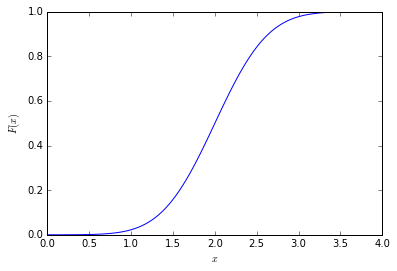

In [4]:
x = np.linspace(0,4,100)
cdf = norm_rv.cdf(x) # функция может принимать и вектор (x)
plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

А так можно вычислить значение функции плотности вероятности нормального распределения в заданной точке:

In [7]:
norm_rv.pdf(2)

0.79788456080286541

Построим график функции плотности вероятности:

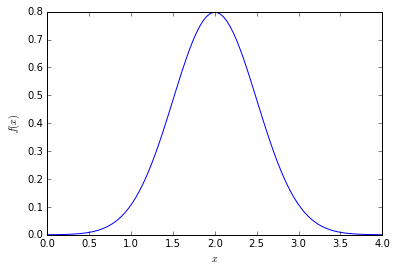

In [6]:
x = np.linspace(0,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Равномерное распределение на отрезке

Вот так можно сгенерировать выборку из случайной величины, имеющей равномерное распределение на отрезке $[a,b]$:

In [7]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([ 2.90068986,  1.30900927,  2.61667386,  1.82853085,  1.11278354,
        1.67101276,  1.48848226,  1.74478797,  1.5155652 ,  2.54059151])

А так — вычислять значения функций распределения и плотностей:

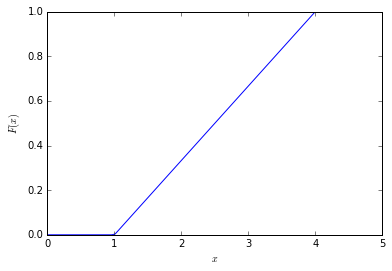

In [8]:
x = np.linspace(0,5,100)
cdf = uniform_rv.cdf(x)
plt.plot(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

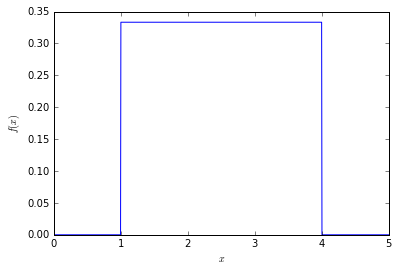

In [9]:
x = np.linspace(0,5,1000)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Распределение Бернулли

Генерация выборок из распределения Бернулли с заданным параметром $p$:

In [10]:
bernoulli_rv = sts.bernoulli(0.7)

bernoulli_rv.rvs(10)

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

# Биномиальное распределение

Генерация выборок из биномиального распределения:

In [11]:
binomial_rv = sts.binom(20, 0.7)
binomial_rv.rvs(10)

array([13, 11, 13, 15, 13, 14, 12, 16, 14, 16])

Первый аргумент функции binom — значение параметра $n$, второй — параметра $p$.

Функция распределения:

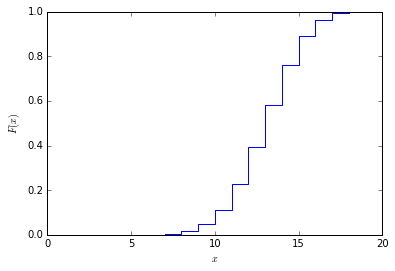

In [12]:
x = np.linspace(0,20,21)
cdf = binomial_rv.cdf(x)
plt.step(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Функция вероятности ```pmf``` для дискретных случайных величин заменяет функцию плотности ```pdf```:

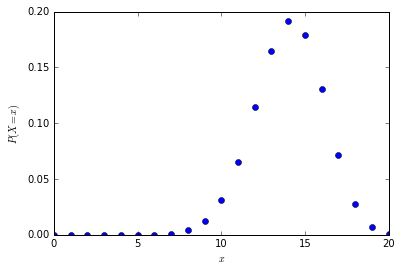

In [13]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

Посмотрим, как ведут себя биномиально распределенные величины при разных значениях параметров:

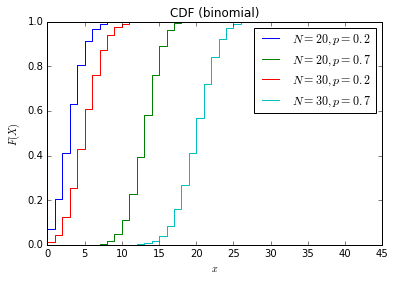

In [14]:
x = np.linspace(0,45,46)
for N in [20, 30]:
    for p in [0.2, 0.7]:
        rv = sts.binom(N, p)
        cdf = rv.cdf(x)
        plt.step(x, cdf, label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("CDF (binomial)")

plt.ylabel('$F(X)$')
plt.xlabel('$x$')

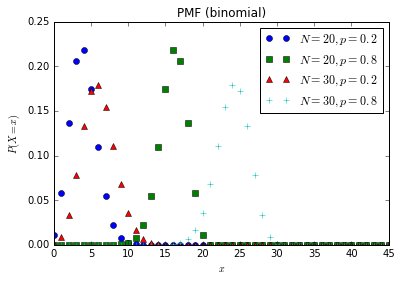

In [15]:
x = np.linspace(0,45,46)
symbols = iter(['o', 's', '^', '+'])
for N in [20, 30]:
    for p in [0.2, 0.8]:
        rv = sts.binom(N, p)
        pmf = rv.pmf(x)
        plt.plot(x, pmf, next(symbols), label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("PMF (binomial)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

# Распределение Пуассона

Генерация выборок из распределения Пуассона с параметром $\lambda$:

In [16]:
poisson_rv = sts.poisson(5)
poisson_rv.rvs(10)

array([ 6, 10,  4,  4,  4,  3,  8,  4,  3,  6])

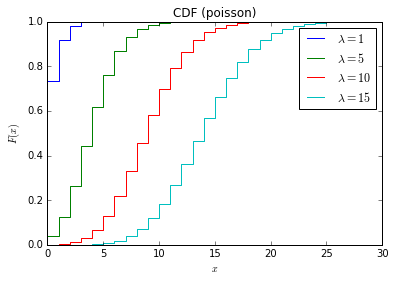

In [17]:
x = np.linspace(0,30,31)
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    cdf = rv.cdf(x)
    plt.step(x, cdf, label="$\lambda=%s$" % l)
plt.legend()
plt.title("CDF (poisson)")

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

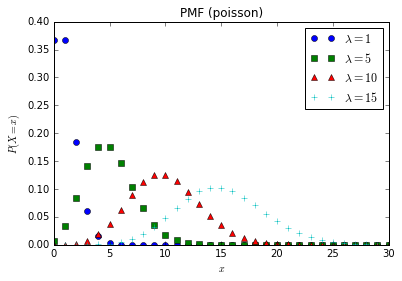

In [18]:
x = np.linspace(0,30,31)

symbols = iter(['o', 's', '^', '+'])
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    pmf = rv.pmf(x)
    plt.plot(x, pmf, next(symbols), label="$\lambda=%s$" % l)
plt.legend()
plt.title("PMF (poisson)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

# Дискретное распределение общего вида

Чтобы сгенерировать дискретную случайную величину общего вида, нужно задать множество её значений и соответствующих вероятностей и использовать функцию ```numpy.random.choice```:

In [19]:
elements = np.array([1, 5, 12])
probabilities = [0.05, 0.7, 0.25]
np.random.choice(elements, 10, p=probabilities)

array([ 5, 12, 12, 12,  5, 12,  5,  5,  5,  5])

# Другие распределения

Существует большое количество других стандартных семейств распределений, многие из которых также можно генерировать в Питоне. 
Например, распределение хи-квадрат $\chi^2_k$, имеющее наутральный параметр $k$, который называется числом степеней свободы:

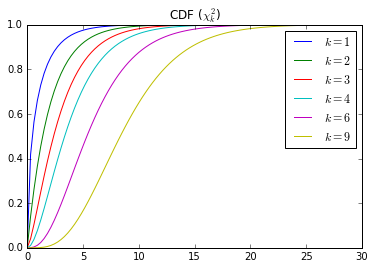

In [33]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    cdf = rv.cdf(x)
    plt.plot(x, cdf, label="$k=%s$" % k)
plt.legend()
plt.title("CDF ($\chi^2_k$)")

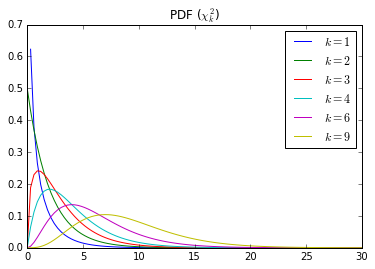

In [35]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
plt.title("PDF ($\chi^2_k$)")

# Выполнение задания по проверке ЦПТ.

In [1]:
#Импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

c:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


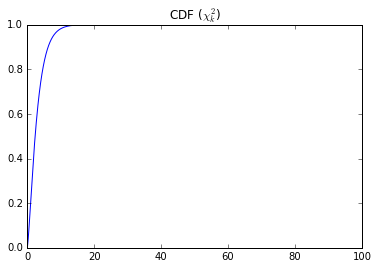

In [224]:
#Для выполнения задания выбрал распределение Хи-квадрат
#Построим распределение для k = 3
k = 3
rv = sts.chi2(k)
x = np.linspace(0,100,1000)
cdf = rv.cdf(x)
plt.plot(x,cdf)
plt.legend()
plt.title("CDF ($\chi^2_k$)")

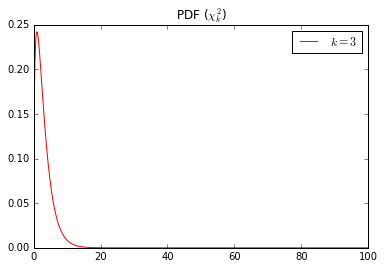

In [225]:
#Построим теоретическую плотность распределения
pdf = rv.pdf(x)
plt.plot(x, pdf, label="$k=%s$" % k, color = "red")
plt.legend()
plt.title("PDF ($\chi^2_k$)")

Measured mean is: 2.99438412448
Measured std is: 1.10247553896


(array([ 0.02632545,  0.17735037,  0.37409844,  0.33530305,  0.24247121,
         0.13716943,  0.05542199,  0.02632545,  0.00415665,  0.00692775]),
 array([ 0.43421033,  1.15594549,  1.87768066,  2.59941582,  3.32115098,
         4.04288615,  4.76462131,  5.48635648,  6.20809164,  6.92982681,
         7.65156197]),
 <a list of 10 Patch objects>)

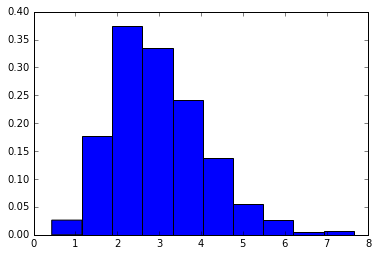

In [226]:
#Сгенерируем 1000 выборок размером 5 и построим гистограмму
plt.subplots()
means_x = []
for i in range(1000):
    t = rv.rvs(5)
    t_mean = t.mean()
    means_x.append(t_mean)
print("Measured mean is:", np.mean(means_x))
print("Measured std is:", np.std(means_x))
plt.hist(means_x,normed=True)

Measured mean is: 3.01309343356
Measured std is: 0.744704623917


(array([ 0.04886049,  0.25704868,  0.40150579,  0.56720659,  0.39725705,
         0.26979489,  0.11471594,  0.04886049,  0.01699495,  0.00212437]),
 array([ 1.25114608,  1.72187404,  2.192602  ,  2.66332996,  3.13405792,
         3.60478588,  4.07551384,  4.5462418 ,  5.01696976,  5.48769772,
         5.95842569]),
 <a list of 10 Patch objects>)

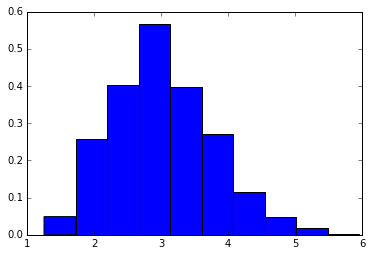

In [227]:
#Сгенерируем 1000 выборок размером 10 и построим гистограмму
plt.subplots()
means_x = []
for i in range(1000):
    t = rv.rvs(10)
    t_mean = t.mean()
    means_x.append(t_mean)
print("Measured mean is:", np.mean(means_x))
print("Measured std is:", np.std(means_x))
plt.hist(means_x,normed=True)      

Measured mean is: 2.97519977773
Measured std is: 0.343101212953


(array([ 0.11951109,  0.42824809,  0.85151655,  1.10547763,  1.06066097,
         0.74694434,  0.38841106,  0.19918516,  0.06971481,  0.00995926]),
 array([ 2.15753959,  2.35835777,  2.55917594,  2.75999412,  2.96081229,
         3.16163047,  3.36244864,  3.56326682,  3.76408499,  3.96490317,
         4.16572135]),
 <a list of 10 Patch objects>)

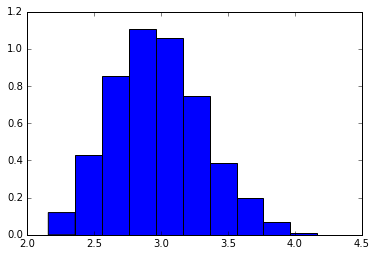

In [228]:
#Сгенерируем 1000 выборок размером 50 и построим гистограмму
plt.subplots()
means_x = []
for i in range(1000):
    t = rv.rvs(50)
    t_mean = t.mean()
    means_x.append(t_mean)
print("Measured mean is:", np.mean(means_x))
print("Measured std is:", np.std(means_x))
plt.hist(means_x,normed=True)      
#Можно заметить, что среднее очень близко к 3

In [222]:
#Определим стандартное отклонение и среднее Хи-квадрат. Их мы будем использовать для построение нормального распределения
vib_std = rv.std()
vib_mean = rv.mean()
print(rv.std())
print(rv.mean())

2.44948974278
3.0


Measured mean is: 3.02799745158
Measured std is: 1.08297354476


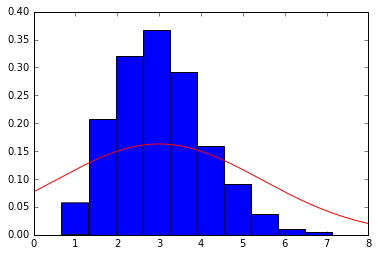

In [259]:
#Теперь построим те же гистограммы, что и ранее и построим еще дополнительно плотность соответствующего нормального распределения.
plt.subplots()
means_x = []
for i in range(1000):
    t = rv.rvs(5)
    t_mean = t.mean()
    means_x.append(t_mean)
print("Measured mean is:", np.mean(means_x))
print("Measured std is:", np.std(means_x))
plt.hist(means_x,normed=True)
x = np.linspace(0,8,1000)
plt.plot(x,mlab.normpdf(x,vib_mean,vib_std), color = "r")

Measured mean is: 2.99777809636
Measured std is: 0.756639187212


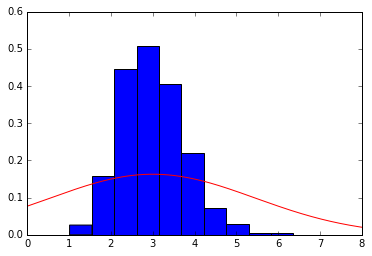

In [261]:
plt.subplots()
means_x = []
for i in range(1000):
    t = rv.rvs(10)
    t_mean = t.mean()
    means_x.append(t_mean)
print("Measured mean is:", np.mean(means_x))
print("Measured std is:", np.std(means_x))
plt.hist(means_x,normed=True)
x = np.linspace(0,8,1000)
plt.plot(x,mlab.normpdf(x,vib_mean,vib_std), color = "r")

Measured mean is: 3.01413895542
Measured std is: 0.349903466907


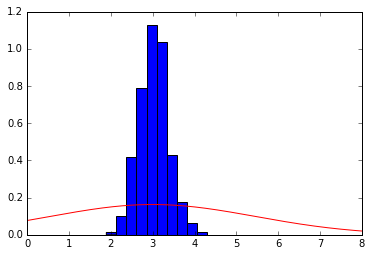

In [262]:
plt.subplots()
means_x = []
for i in range(1000):
    t = rv.rvs(50)
    t_mean = t.mean()
    means_x.append(t_mean)
print("Measured mean is:", np.mean(means_x))
print("Measured std is:", np.std(means_x))
plt.hist(means_x,normed=True)
x = np.linspace(0,8,1000)
plt.plot(x,mlab.normpdf(x,vib_mean,vib_std), color = "r")

Можно заметить, что с увеличением размера выборки (n) уменьшается стандартное отклонение по выборке.
Что касается точности аппроксимации, то с увеличением n она падает, т.к. мы используем не выборочные среднее и стандартное отклонение, а теоретические значения. Если бы мы использовали выборочные, то точность аппроксимации росла бы с ростом n.